In [1]:
import numpy as np

def qGaussianDist(nSamples, qDist):
   
    # Check that q < 3
    if qDist < 3:
        # Calculate the q to be used on the q-log
        qGen = (1 + qDist) / (3 - qDist)
        # Initialize the output vector
        qGaussian = np.zeros(nSamples)
        
        for k in range(nSamples):
            # Get two uniform random deviates 
            u1 = np.random.rand()
            u2 = np.random.rand()
            # Apply the q-Box-Muller algorithm
            R = np.sqrt(-2 * log_q(u1, qGen))
            qGaussian[k] = R * np.sin(2 * np.pi * u2)
        return qGaussian
    else:
        print('q value must be less than 3')
        return 0

def log_q(x, q):
    
    # Check to see if q = 1
    if q == 1:
        return np.log(x)
    else:
        return (x ** (1 - q) - 1) / (1 - q)

nSamples = 1000
qDist = 1.5
result = qGaussianDist(nSamples, qDist)
print(result)


[-6.09354004e-01 -2.37520248e-01  2.18293558e+00 -4.10309181e-01
 -8.92483974e-01  8.96681591e-02 -1.78643759e-01 -1.02337669e-01
  4.12700832e-01 -4.24100644e-01 -7.85444501e-01  1.25927835e+00
  2.51380579e+00 -1.97508848e+00 -3.18807095e+00  3.18513758e-01
 -5.03022840e-01 -1.48697618e+00 -9.86422466e-01 -1.21369114e+00
  9.56173575e-01 -1.37517196e+00  5.55785234e-01 -2.21173795e-01
 -2.89328056e-01  4.81269285e-01  6.23069219e-01  1.70523691e+00
  8.78755063e-01  3.08468128e-01 -3.74179548e+00  3.26096168e-02
  9.14965271e-02 -1.02325735e-01 -1.64586846e-01 -3.37976834e-01
  4.85185410e-01 -2.18887980e-01 -3.35929436e+00 -1.78309220e+00
 -1.22783659e-01  1.10959710e-01 -1.09240019e+00 -5.46540874e-02
  5.72458338e-01  1.39643828e+00 -2.57611053e+00 -2.66460341e+00
 -1.41445638e+00  2.79314881e-01  1.67883252e-01 -5.03722924e-01
  2.99201585e-01  1.76280380e+00  8.38757304e-01  6.04174247e-02
  7.61726896e-01  1.62821489e+00  2.70022898e+00  5.99084784e-01
  2.26803057e+00  1.91845

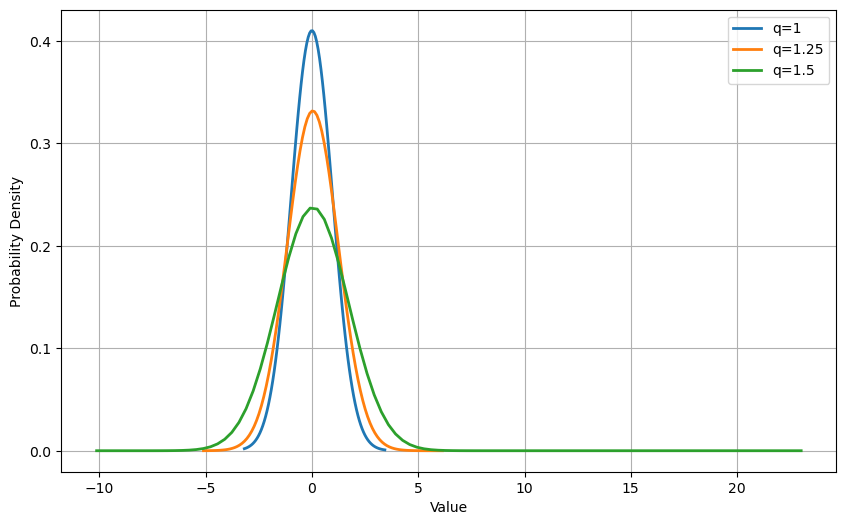

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def qGaussianDist(nSamples, qDist):
     # Check that q < 3
    if qDist < 3:
        # Calculate the q to be used on the q-log
        qGen = (1 + qDist) / (3 - qDist)
        # Initialize the output vector
        qGaussian = np.zeros(nSamples)
        
        for k in range(nSamples):
            # Get two uniform random deviates 
            u1 = np.random.rand()
            u2 = np.random.rand()
            # Apply the q-Box-Muller algorithm
            R = np.sqrt(-2 * log_q(u1, qGen))
            qGaussian[k] = R * np.sin(2 * np.pi * u2)
        return qGaussian
    else:
        print('q value must be less than 3')
        return 0

def log_q(x, q):
    
    # Check to see if q = 1
    if q == 1:
        return np.log(x)
    else:
        return (x ** (1 - q) - 1) / (1 - q)


nSamples = 2000
q_values = [1, 1.25, 1.5]  # Different q values

plt.figure(figsize=(10, 6))

for qDist in q_values:
    result = qGaussianDist(nSamples, qDist)

    # Plot normal distribution curve
    mu, std = np.mean(result), np.std(result)
    xmin, xmax = min(result), max(result)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, linewidth=2, label='q={}'.format(qDist))

plt.title('')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


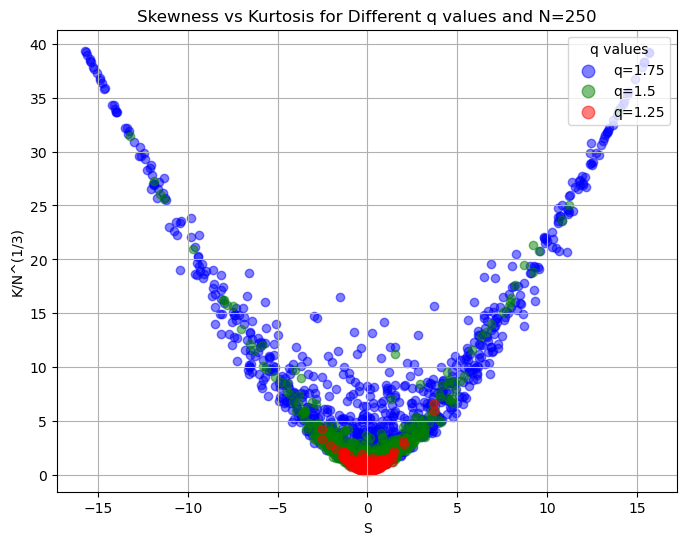

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

def qGaussianDist(nSamples, qDist):
     # Check that q < 3
    if qDist < 3:
        # Calculate the q to be used on the q-log
        qGen = (1 + qDist) / (3 - qDist)
        # Initialize the output vector
        qGaussian = np.zeros(nSamples)
        
        for k in range(nSamples):
            # Get two uniform random deviates 
            u1 = np.random.rand()
            u2 = np.random.rand()
            # Apply the q-Box-Muller algorithm
            R = np.sqrt(-2 * log_q(u1, qGen))
            qGaussian[k] = R * np.sin(2 * np.pi * u2)
        return qGaussian
    else:
        print('q value must be less than 3')
        return 0

def log_q(x, q):
    
    # Check to see if q = 1
    if q == 1:
        return np.log(x)
    else:
        return (x ** (1 - q) - 1) / (1 - q)

# Number of samples
nSamples = 250
nSimulations = 1000

q_values = [1.75, 1.5, 1.25]
colors = ['blue', 'green', 'red']  
markers = ['o', 'o', 'o']  

plt.figure(figsize=(8, 6))

# Initialize arrays to accumulate results
skewness_values = {q: [] for q in q_values}
kurtosis_values = {q: [] for q in q_values}

# Loop over simulations
for sim in range(nSimulations):
    # Generate data points for each q value and calculate skewness and kurtosis
    for qIdx, qDist in enumerate(q_values):
        S_values = qGaussianDist(nSamples, qDist)
        skewness = skew(S_values)
        kurt = kurtosis(S_values, fisher=False)
        skewness_values[qDist].append(skewness)
        kurtosis_values[qDist].append(kurt)


for qIdx, qDist in enumerate(q_values):
    plt.scatter(skewness_values[qDist], np.array(kurtosis_values[qDist])/nSamples**(1/3), alpha=0.5, c=colors[qIdx], marker=markers[qIdx], label=f'q={qDist}')

plt.title('Skewness vs Kurtosis for Different q values and N=250')
plt.xlabel('S')
plt.ylabel('K/N^(1/3)')
plt.grid(True)
plt.legend(title='q values', loc='upper right', markerscale=1.5)
plt.show()


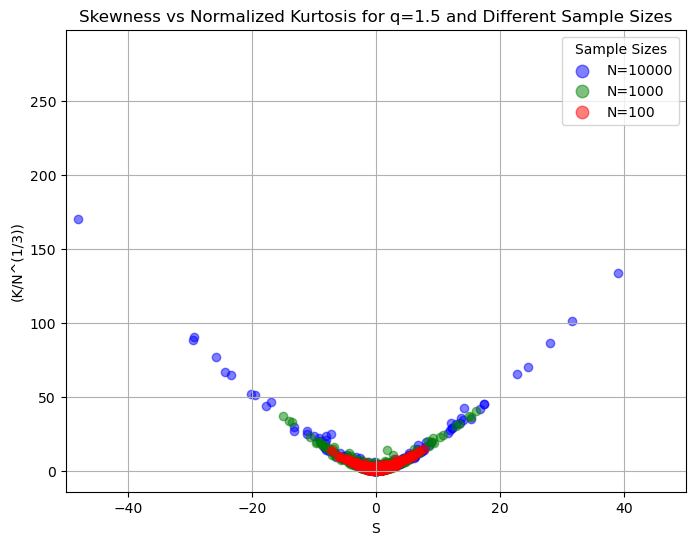

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

def qGaussianDist(nSamples, qDist):
     # Check that q < 3
    if qDist < 3:
        # Calculate the q to be used on the q-log
        qGen = (1 + qDist) / (3 - qDist)
        # Initialize the output vector
        qGaussian = np.zeros(nSamples)
        
        for k in range(nSamples):
            # Get two uniform random deviates 
            u1 = np.random.rand()
            u2 = np.random.rand()
            # Apply the q-Box-Muller algorithm
            R = np.sqrt(-2 * log_q(u1, qGen))
            qGaussian[k] = R * np.sin(2 * np.pi * u2)
        return qGaussian
    else:
        print('q value must be less than 3')
        return 0

def log_q(x, q):
    
    # Check to see if q = 1
    if q == 1:
        return np.log(x)
    else:
        return (x ** (1 - q) - 1) / (1 - q)


# Define q value
qDist = 1.5

# Define sample sizes
nSamples_list = [10000, 1000, 100]
nSimulations = 1000

# Colors for different sample sizes
colors = ['blue', 'green', 'red']

plt.figure(figsize=(8, 6))

# Loop over different sample sizes
for idx, nSamples in enumerate(nSamples_list):
    # Initialize arrays to accumulate results
    skewness_values = []
    kurtosis_values = []
    
    # Loop over simulations for each sample size
    for _ in range(nSimulations):
        # Generate data points for fixed q and varied sample size
        S_values = qGaussianDist(nSamples, qDist)
        
        # Calculate skewness and kurtosis
        skewness = skew(S_values)
        kurt = kurtosis(S_values, fisher=False)
        
        # Normalize kurtosis by N^(1/3)
        kurt_normalized = kurt / nSamples ** (1/3)
        
        # Accumulate skewness and normalized kurtosis values
        skewness_values.append(skewness)
        kurtosis_values.append(kurt_normalized)
    
    # Plot skewness vs normalized kurtosis for each sample size
    plt.scatter(skewness_values, kurtosis_values, alpha=0.5, c=colors[idx], label=f'N={nSamples}')

plt.title(f'Skewness vs Normalized Kurtosis for q={qDist} and Different Sample Sizes')
plt.xlabel('S')
plt.ylabel('(K/N^(1/3))')
plt.grid(True)

plt.legend(title='Sample Sizes', loc='upper right', markerscale=1.5)
plt.xlim(-50, 50)  
plt.show()


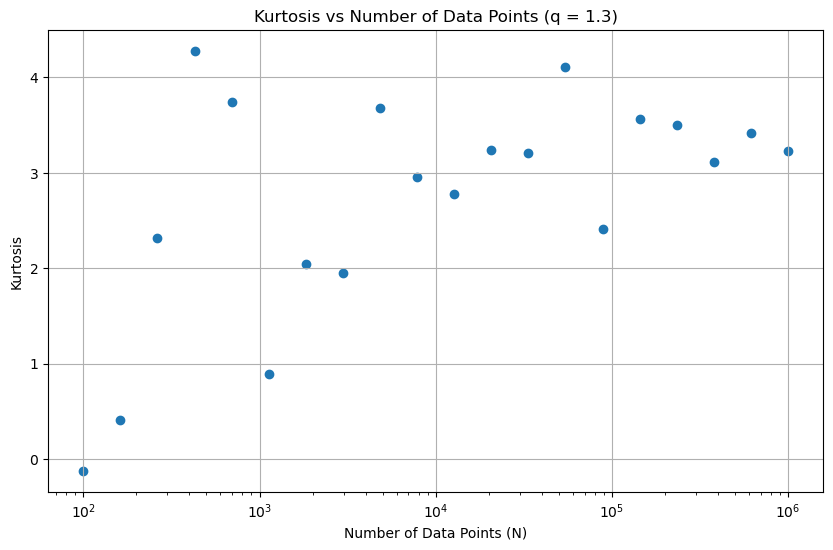

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

def qGaussianDist(nSamples, qDist):
    
    # Check that q < 3
    if qDist < 3:
        # Calculate the q to be used on the q-log
        qGen = (1 + qDist) / (3 - qDist)
        qGaussian = np.zeros(nSamples)
       
        for k in range(nSamples):
            # Get two uniform random deviates 
            u1 = np.random.rand()
            u2 = np.random.rand()
            # Apply the q-Box-Muller algorithm
            R = np.sqrt(-2 * log_q(u1, qGen))
            qGaussian[k] = R * np.sin(2 * np.pi * u2)
        return qGaussian
    else:
        print('q value must be less than 3')
        return 0

def log_q(x, q):
   
    if q == 1:
        return np.log(x)
    else:
        return (x ** (1 - q) - 1) / (1 - q)

n_samples_range = np.logspace(2, 6, num=20, dtype=int)  # N ranging from 100 to 1,000,000

qDist = 1.3

# Calculate kurtosis for different sample sizes
kurtosis_values = []
for nSamples in n_samples_range:
    samples = qGaussianDist(nSamples, qDist)
    kurtosis_values.append(kurtosis(samples))

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(n_samples_range, kurtosis_values)
plt.title('Kurtosis vs Number of Data Points (q = 1.3)')
plt.xlabel('Number of Data Points (N)')
plt.ylabel('Kurtosis')
plt.xscale('log')
plt.grid(True)
plt.show()


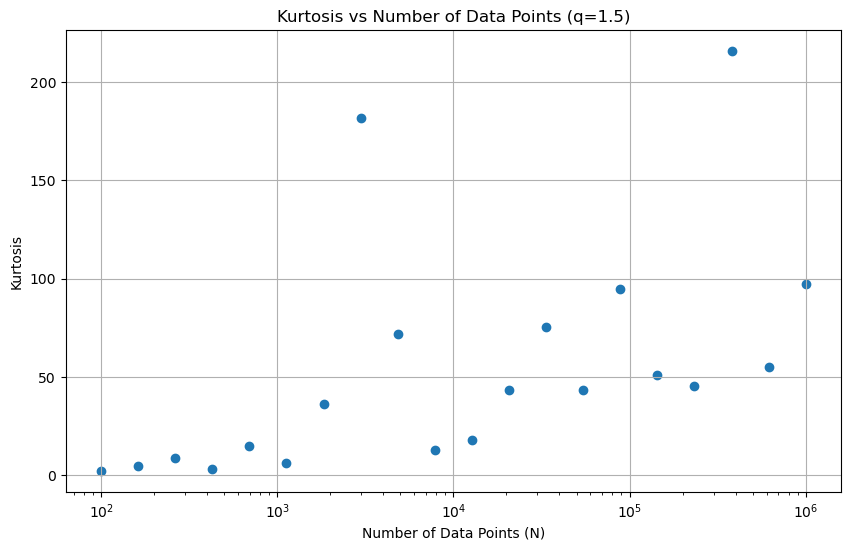

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

def qGaussianDist(nSamples, qDist):
   
    if qDist < 3:
        # Calculate the q to be used on the q-log
        qGen = (1 + qDist) / (3 - qDist)
       
        qGaussian = np.zeros(nSamples)
        
        for k in range(nSamples):
            # Get two uniform random deviates 
            u1 = np.random.rand()
            u2 = np.random.rand()
            # Apply the q-Box-Muller algorithm
            R = np.sqrt(-2 * log_q(u1, qGen))
            qGaussian[k] = R * np.sin(2 * np.pi * u2)
        return qGaussian
    else:
        print('q value must be less than 3')
        return 0

def log_q(x, q):
   
    if q == 1:
        return np.log(x)
    else:
        return (x ** (1 - q) - 1) / (1 - q)


n_samples_range = np.logspace(2, 6, num=20, dtype=int)  # N ranging from 100 to 1,000,000

qDist = 1.5

# Calculate kurtosis for different sample sizes
kurtosis_values = []
for nSamples in n_samples_range:
    samples = qGaussianDist(nSamples, qDist)
    kurtosis_values.append(kurtosis(samples))

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(n_samples_range, kurtosis_values)
plt.title('Kurtosis vs Number of Data Points (q=1.5)')
plt.xlabel('Number of Data Points (N)')
plt.ylabel('Kurtosis')
plt.xscale('log')
plt.grid(True)
plt.show()


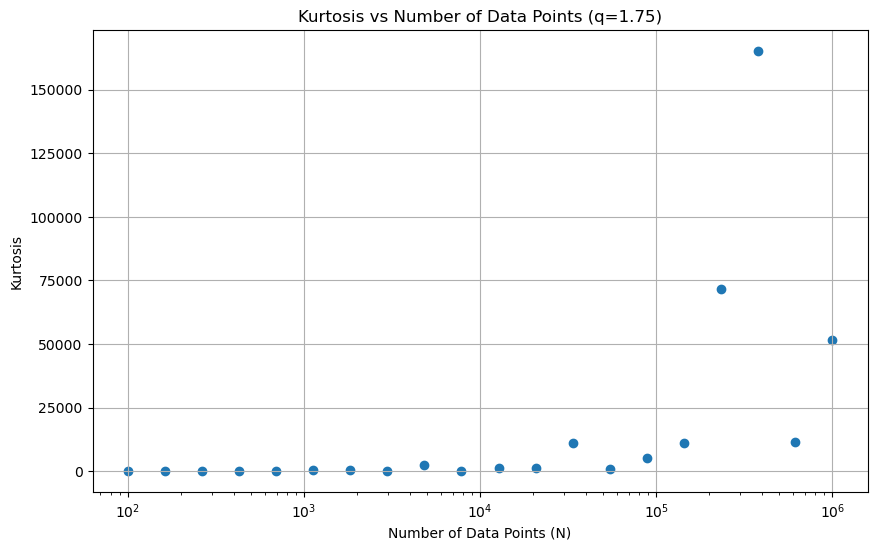

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

def qGaussianDist(nSamples, qDist):
   
    # Check that q < 3
    if qDist < 3:
        # Calculate the q to be used on the q-log
        qGen = (1 + qDist) / (3 - qDist)
        qGaussian = np.zeros(nSamples)
        for k in range(nSamples):
            # Get two uniform random deviates
            u1 = np.random.rand()
            u2 = np.random.rand()
            # Apply the q-Box-Muller algorithm
            R = np.sqrt(-2 * log_q(u1, qGen))
            qGaussian[k] = R * np.sin(2 * np.pi * u2)
        return qGaussian
    else:
        print('q value must be less than 3')
        return 0

def log_q(x, q):
    
    if q == 1:
        return np.log(x)
    else:
        return (x ** (1 - q) - 1) / (1 - q)

n_samples_range = np.logspace(2, 6, num=20, dtype=int)  # N ranging from 100 to 1,000,000

qDist = 1.75

# Calculate kurtosis for different sample sizes
kurtosis_values = []
for nSamples in n_samples_range:
    samples = qGaussianDist(nSamples, qDist)
    kurtosis_values.append(kurtosis(samples))

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(n_samples_range, kurtosis_values)
plt.title('Kurtosis vs Number of Data Points (q=1.75)')
plt.xlabel('Number of Data Points (N)')
plt.ylabel('Kurtosis')
plt.xscale('log')
plt.grid(True)
plt.show()


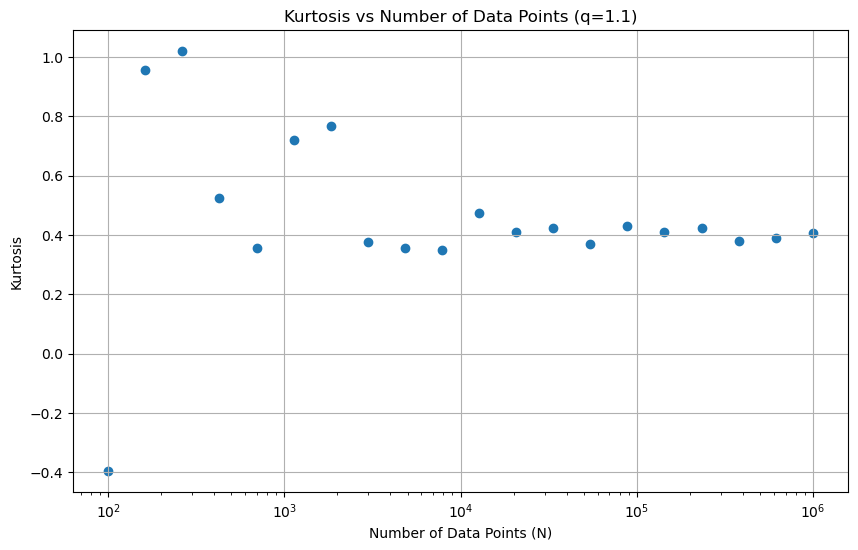

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

def qGaussianDist(nSamples, qDist):
   
    # Check that q < 3
    if qDist < 3:
        # Calculate the q to be used on the q-log
        qGen = (1 + qDist) / (3 - qDist)
        qGaussian = np.zeros(nSamples)
        for k in range(nSamples):
            # Get two uniform random deviates
            u1 = np.random.rand()
            u2 = np.random.rand()
            # Apply the q-Box-Muller algorithm
            R = np.sqrt(-2 * log_q(u1, qGen))
            qGaussian[k] = R * np.sin(2 * np.pi * u2)
        return qGaussian
    else:
        print('q value must be less than 3')
        return 0

def log_q(x, q):
  
    if q == 1:
        return np.log(x)
    else:
        return (x ** (1 - q) - 1) / (1 - q)

n_samples_range = np.logspace(2, 6, num=20, dtype=int)  # N ranging from 100 to 1,000,000

qDist = 1.1

# Calculate kurtosis for different sample sizes
kurtosis_values = []
for nSamples in n_samples_range:
    samples = qGaussianDist(nSamples, qDist)
    kurtosis_values.append(kurtosis(samples))

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(n_samples_range, kurtosis_values)
plt.title('Kurtosis vs Number of Data Points (q=1.1)')
plt.xlabel('Number of Data Points (N)')
plt.ylabel('Kurtosis')
plt.xscale('log')
plt.grid(True)
plt.show()


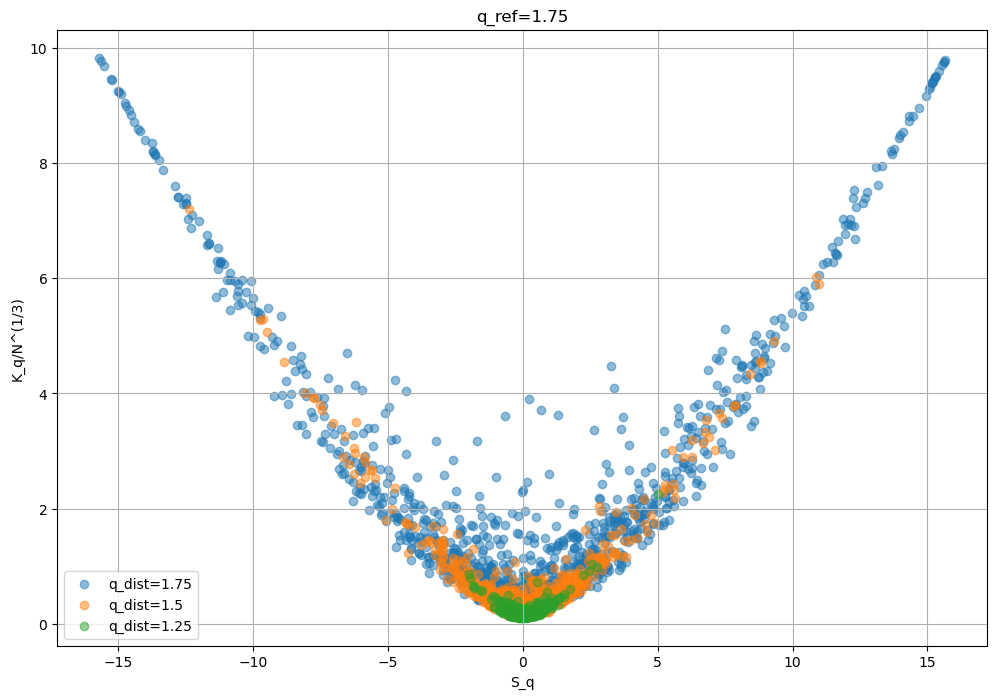

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def qGaussianDist(nSamples, qDist):
    # Check that q < 3
    if qDist < 3:
        # Calculate the q to be used on the q-log
        qGen = (1 + qDist) / (3 - qDist)
        qGaussian = np.zeros(nSamples)
        for k in range(nSamples):
            # Get two uniform random deviates 
            u1 = np.random.rand()
            u2 = np.random.rand()
            # Apply the q-Box-Muller algorithm
            R = np.sqrt(-2 * log_q(u1, qGen))
            qGaussian[k] = R * np.sin(2 * np.pi * u2)
        return qGaussian
    else:
        print('q value must be less than 3')
        return 0

def log_q(x, q):
   
    if q == 1:
        return np.log(x)
    else:
        return (x ** (1 - q) - 1) / (1 - q)

# Function to calculate q-skewness
def q_skewness(q, x,samples, p_x):
    q_3 = 1 + 3 * (q - 1) / 2
    q_2 = 1 + 2 * (q - 1) / 2
    q_1 = 1 + 1 * (q - 1) / 2
    mean_q = np.sum(x * p_x**q_1) / np.sum(p_x**q_1)
    third_moment = np.sum((x - mean_q)**3 * p_x**q_3) / np.sum(p_x**q_3)
    second_moment = np.sum((x - mean_q)**2 * p_x**q_2) / np.sum(p_x**q_2)
    return third_moment / second_moment**(3/2)

# Function to calculate q-kurtosis
def q_kurtosis(q, x,samples, p_x):
    q_4 = 1 + 4 * (q - 1) / 2
    q_2 = 1 + 2 * (q - 1) / 2
    q_1 = 1 + 1 * (q - 1) / 2
    mean_q = np.sum(x * p_x**q_1) / np.sum(p_x**q_1)
   
    fourth_moment = np.sum((x - mean_q)**4 * p_x**q_4) / np.sum(p_x**q_4)
    second_moment = np.sum((x - mean_q)**2 * p_x**q_2) / np.sum(p_x**q_2)
    return fourth_moment / (4* second_moment**2)  

# Number of simulations
n_simulations = 1000

# Number of samples
n_samples = 250

# Value of q for reference q_ref
q_ref = 1.75 

# Values of q to simulate for q_dist
q_dist_values = [1.75, 1.5, 1.25]  

# Lists to store results for each q_dist value
S_dist_lists = []
K_dist_normalized_lists = []

# Generate data for q_dist values and calculate S_q and K_q using q_ref
for q_dist in q_dist_values:
    S_dist_list = []
    K_dist_normalized_list = []
    
    for _ in range(n_simulations):
        # Generate q-Gaussian samples for q_ref
        samples_dist = qGaussianDist(n_samples, q_dist)
        
        # Compute K/N^(1/3) using q_ref
        K_dist = q_kurtosis(q_ref, samples_dist,n_samples, np.ones_like(samples_dist)/n_samples)
        K_dist_normalized = K_dist / n_samples**(1/3)

        # Compute S_q using q_dist
        S_dist = q_skewness(q_ref, samples_dist,n_samples, np.ones_like(samples_dist)/n_samples)
        
        # Append results to lists
        S_dist_list.append(S_dist)
        K_dist_normalized_list.append(K_dist_normalized)
    
    # Append results for this q_dist value to the overall lists
    S_dist_lists.append(S_dist_list)
    K_dist_normalized_lists.append(K_dist_normalized_list)

# Plot S_q vs K/N^(1/3) for each q_dist value
plt.figure(figsize=(12, 8))
for i in range(len(q_dist_values)):
    plt.scatter(S_dist_lists[i], K_dist_normalized_lists[i], alpha=0.5, label=f'q_dist={q_dist_values[i]}')
plt.xlabel('S_q')
plt.ylabel('K_q/N^(1/3)')
plt.title(f'q_ref={q_ref}')
plt.legend()
plt.grid(True)
plt.show()


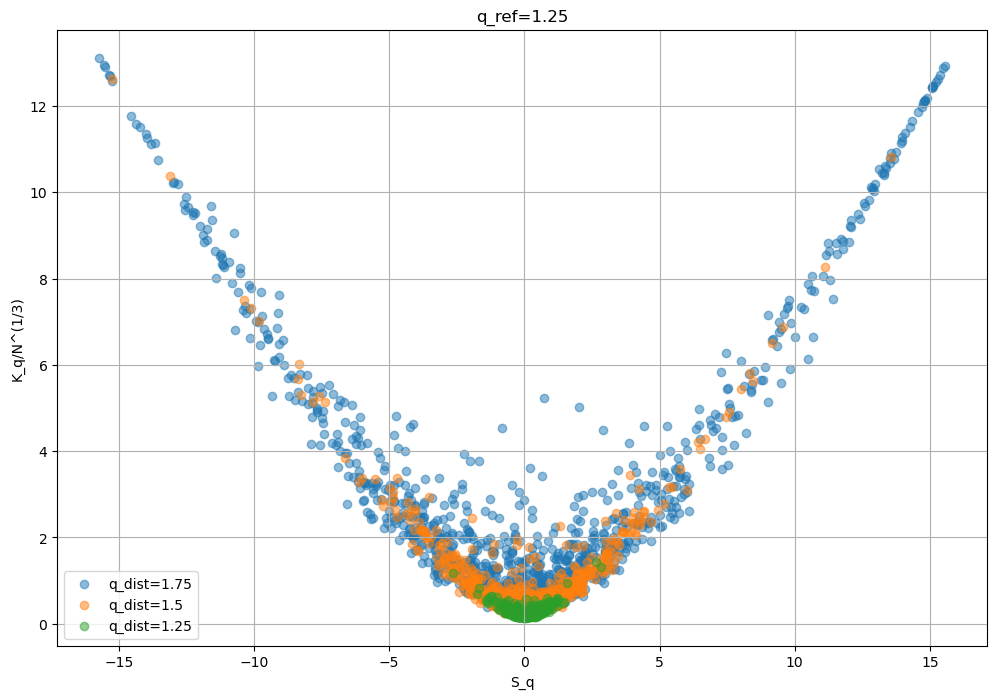

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def qGaussianDist(nSamples, qDist):
    
    if qDist < 3:
        # Calculate the q to be used on the q-log
        qGen = (1 + qDist) / (3 - qDist)
        qGaussian = np.zeros(nSamples)
        for k in range(nSamples):
            # Get two uniform random deviates 
            u1 = np.random.rand()
            u2 = np.random.rand()
            # Apply the q-Box-Muller algorithm
            R = np.sqrt(-2 * log_q(u1, qGen))
            qGaussian[k] = R * np.sin(2 * np.pi * u2)
        return qGaussian
    else:
        print('q value must be less than 3')
        return 0

def log_q(x, q):
    if q == 1:
        return np.log(x)
    else:
        return (x ** (1 - q) - 1) / (1 - q)

# Function to calculate q-skewness
def q_skewness(q, x, p_x):
    q_3 = 1 + 3 * (q - 1) / 2
    q_2 = 1 + 2 * (q - 1) / 2
    q_1 = 1 + 1 * (q - 1) / 2
    mean_q = np.sum(x * p_x**q_1) / np.sum(p_x**q_1)
    third_moment = np.sum((x - mean_q)**3 * p_x**q_3) / np.sum(p_x**q_3)
    second_moment = np.sum((x - mean_q)**2 * p_x**q_2) / np.sum(p_x**q_2)
    return third_moment / second_moment**(3/2)

# Function to calculate q-kurtosis
def q_kurtosis(q, x, p_x):
    q_4 = 1 + 4 * (q - 1) / 2
    q_2 = 1 + 2 * (q - 1) / 2
    q_1 = 1 + 1 * (q - 1) / 2
    mean_q = np.sum(x * p_x**q_1) / np.sum(p_x**q_1)
   
    fourth_moment = np.sum((x - mean_q)**4 * p_x**q_4) / np.sum(p_x**q_4)
    second_moment = np.sum((x - mean_q)**2 * p_x**q_2) / np.sum(p_x**q_2)
    return fourth_moment / (3 * second_moment**2)  # Corrected formula

# Number of simulations
n_simulations = 1000

# Number of samples
n_samples = 250

# Value of q for reference q_ref
q_ref = 1.25  

# Values of q to simulate for q_dist
q_dist_values = [1.75, 1.5, 1.25]  
# Lists to store results for each q_dist value
S_dist_lists = []
K_dist_normalized_lists = []

# Generate data for q_dist values and calculate S_q and K_q using q_ref
for q_dist in q_dist_values:
    S_dist_list = []
    K_dist_normalized_list = []
    
    for _ in range(n_simulations):
        # Generate q-Gaussian samples for q_ref
        samples_dist = qGaussianDist(n_samples, q_dist)
        
        # Compute K/N^(1/3) using q_ref
        K_dist = q_kurtosis(q_ref, samples_dist, np.ones_like(samples_dist)/n_samples)
        K_dist_normalized = K_dist / n_samples**(1/3)

        # Compute S_q using q_dist
        S_dist = q_skewness(q_ref, samples_dist, np.ones_like(samples_dist)/n_samples)
        
        # Append results to lists
        S_dist_list.append(S_dist)
        K_dist_normalized_list.append(K_dist_normalized)
    
    # Append results for this q_dist value to the overall lists
    S_dist_lists.append(S_dist_list)
    K_dist_normalized_lists.append(K_dist_normalized_list)

# Plot S_q vs K/N^(1/3) for each q_dist value
plt.figure(figsize=(12, 8))
for i in range(len(q_dist_values)):
    plt.scatter(S_dist_lists[i], K_dist_normalized_lists[i], alpha=0.5, label=f'q_dist={q_dist_values[i]}')
plt.xlabel('S_q')
plt.ylabel('K_q/N^(1/3)')
plt.title(f'q_ref={q_ref}')
plt.legend()
plt.grid(True)
plt.show()


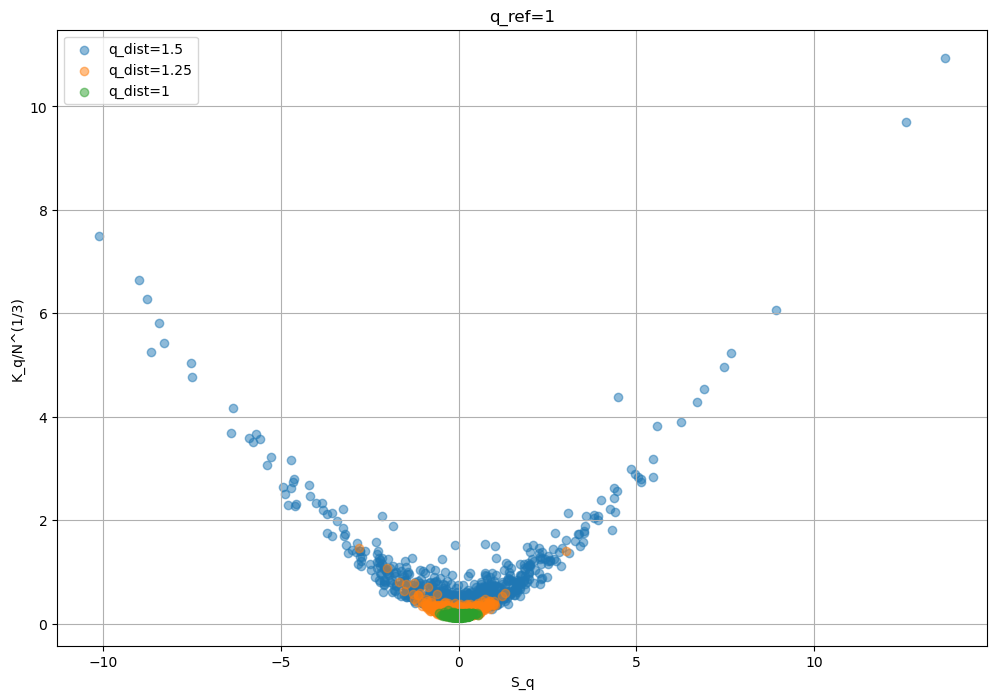

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def qGaussianDist(nSamples, qDist):
    
    if qDist < 3:
        # Calculate the q to be used on the q-log
        qGen = (1 + qDist) / (3 - qDist)
        qGaussian = np.zeros(nSamples)
        for k in range(nSamples):
            # Get two uniform random deviates 
            u1 = np.random.rand()
            u2 = np.random.rand()
            # Apply the q-Box-Muller algorithm
            R = np.sqrt(-2 * log_q(u1, qGen))
            qGaussian[k] = R * np.sin(2 * np.pi * u2)
        return qGaussian
    else:
        print('q value must be less than 3')
        return 0

def log_q(x, q):
    if q == 1:
        return np.log(x)
    else:
        return (x ** (1 - q) - 1) / (1 - q)

# Function to calculate q-skewness
def q_skewness(q, x, p_x):
    q_3 = 1 + 3 * (q - 1) / 2
    q_2 = 1 + 2 * (q - 1) / 2
    q_1 = 1 + 1 * (q - 1) / 2
    mean_q = np.sum(x * p_x**q_1) / np.sum(p_x**q_1)
    third_moment = np.sum((x - mean_q)**3 * p_x**q_3) / np.sum(p_x**q_3)
    second_moment = np.sum((x - mean_q)**2 * p_x**q_2) / np.sum(p_x**q_2)
    return third_moment / second_moment**(3/2)

# Function to calculate q-kurtosis
def q_kurtosis(q, x, p_x):
    q_4 = 1 + 4 * (q - 1) / 2
    q_2 = 1 + 2 * (q - 1) / 2
    q_1 = 1 + 1 * (q - 1) / 2
    mean_q = np.sum(x * p_x**q_1) / np.sum(p_x**q_1)
   
    fourth_moment = np.sum((x - mean_q)**4 * p_x**q_4) / np.sum(p_x**q_4)
    second_moment = np.sum((x - mean_q)**2 * p_x**q_2) / np.sum(p_x**q_2)
    return fourth_moment / (3 * second_moment**2)  # Corrected formula

# Number of simulations
n_simulations = 1000

# Number of samples
n_samples = 250

# Value of q for reference q_ref
q_ref = 1  

# Values of q to simulate for q_dist
q_dist_values = [1.5, 1.25, 1]  
# Lists to store results for each q_dist value
S_dist_lists = []
K_dist_normalized_lists = []

# Generate data for q_dist values and calculate S_q and K_q using q_ref
for q_dist in q_dist_values:
    S_dist_list = []
    K_dist_normalized_list = []
    
    for _ in range(n_simulations):
        # Generate q-Gaussian samples for q_ref
        samples_dist = qGaussianDist(n_samples, q_dist)
        
        # Compute K/N^(1/3) using q_ref
        K_dist = q_kurtosis(q_ref, samples_dist, np.ones_like(samples_dist)/n_samples)
        K_dist_normalized = K_dist / n_samples**(1/3)

        # Compute S_q using q_dist
        S_dist = q_skewness(q_ref, samples_dist, np.ones_like(samples_dist)/n_samples)
        
        # Append results to lists
        S_dist_list.append(S_dist)
        K_dist_normalized_list.append(K_dist_normalized)
    
    # Append results for this q_dist value to the overall lists
    S_dist_lists.append(S_dist_list)
    K_dist_normalized_lists.append(K_dist_normalized_list)

# Plot S_q vs K/N^(1/3) for each q_dist value
plt.figure(figsize=(12, 8))
for i in range(len(q_dist_values)):
    plt.scatter(S_dist_lists[i], K_dist_normalized_lists[i], alpha=0.5, label=f'q_dist={q_dist_values[i]}')
plt.xlabel('S_q')
plt.ylabel('K_q/N^(1/3)')
plt.title(f'q_ref={q_ref}')
plt.legend()
plt.grid(True)
plt.show()


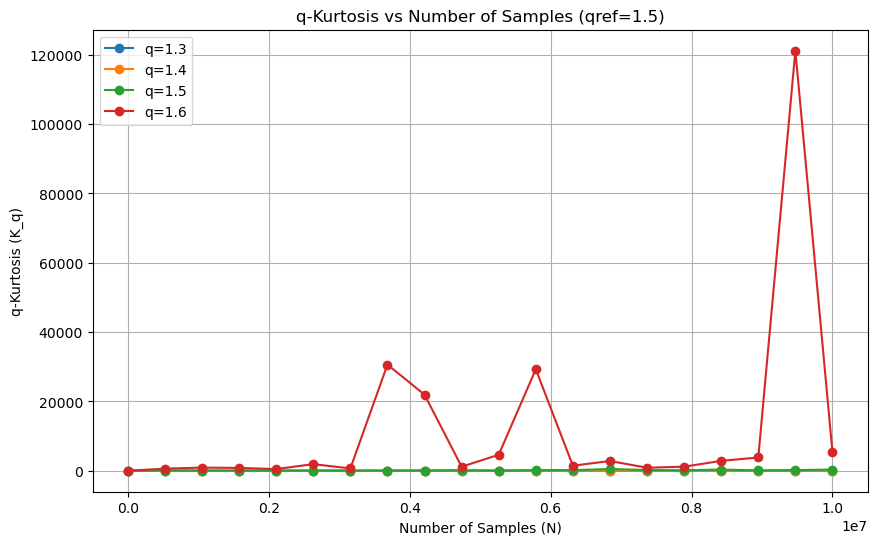

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def qGaussianDist(nSamples, qDist):
    
    # Check that q < 3
    if qDist < 3:
        # Calculate the q to be used on the q-log
        qGen = (1 + qDist) / (3 - qDist)
        qGaussian = np.zeros(nSamples)
        for k in range(nSamples):
            # Get two uniform random deviates 
            u1 = np.random.rand()
            u2 = np.random.rand()
            # Apply the q-Box-Muller algorithm
            R = np.sqrt(-2 * log_q(u1, qGen))
            qGaussian[k] = R * np.sin(2 * np.pi * u2)
        return qGaussian
    else:
        print('q value must be less than 3')
        return 0

def log_q(x, q):
   
    if q == 1:
        return np.log(x)
    else:
        return (x ** (1 - q) - 1) / (1 - q)

def q_kurtosis(samples, q, p_x, qref):
   
    q_1 = 1 + (1 * (q - 1) / 2)
    mean_q = np.sum(samples * p_x**q_1) / np.sum(p_x**q_1)
    x_centered = samples - mean_q
    numerator = np.sum(x_centered ** 4) / len(samples)
    denominator = (np.sum(x_centered ** 2) / len(samples)) ** 2
    return numerator / (3 * denominator)

nSamples_range = np.linspace(100, 10**7, 20, dtype=int)  # Range of number of samples with 20 points
q_values = [1.3, 1.4, 1.5, 1.6]  
qref = 1.5  # Reference q value for calculating kurtosis

kurtosis_values = []

for qDist in q_values:
    kurtosis = []
    for nSamples in nSamples_range:
        # Generate data from qdist for each sample size and q value
        samples = qGaussianDist(nSamples, qDist)
        # Random probability distribution p_x
        p_x = np.random.rand(nSamples)
        # Calculate kurtosis using the provided mean formula and qref
        kurt = q_kurtosis(samples, qDist, p_x, qref)
        kurtosis.append(kurt)
    kurtosis_values.append(kurtosis)

# Plotting
plt.figure(figsize=(10, 6))
for i, qDist in enumerate(q_values):
    plt.plot(nSamples_range, kurtosis_values[i], marker='o', label=f'q={qDist}')

plt.xlabel('Number of Samples (N)')
plt.ylabel('q-Kurtosis (K_q)') 
plt.title(f'q-Kurtosis vs Number of Samples (qref={qref})')
plt.grid(True)
plt.legend()
plt.show()


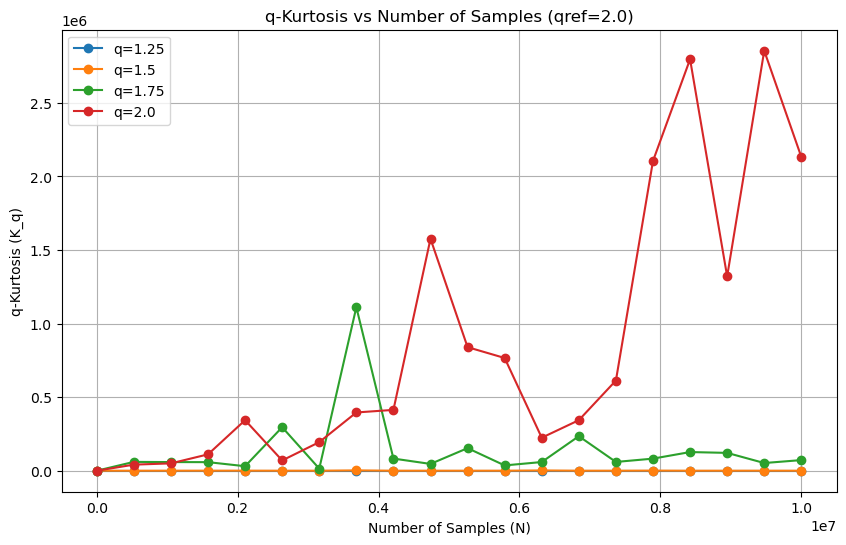

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def qGaussianDist(nSamples, qDist):
    
    # Check that q < 3
    if qDist < 3:
        # Calculate the q to be used on the q-log
        qGen = (1 + qDist) / (3 - qDist)
        qGaussian = np.zeros(nSamples)
        for k in range(nSamples):
            # Get two uniform random deviates 
            u1 = np.random.rand()
            u2 = np.random.rand()
            # Apply the q-Box-Muller algorithm
            R = np.sqrt(-2 * log_q(u1, qGen))
            qGaussian[k] = R * np.sin(2 * np.pi * u2)
        return qGaussian
    else:
        print('q value must be less than 3')
        return 0

def log_q(x, q):
   
    if q == 1:
        return np.log(x)
    else:
        return (x ** (1 - q) - 1) / (1 - q)

def q_kurtosis(samples, q, p_x, qref):
   
    q_1 = 1 + (1 * (q - 1) / 2)
    mean_q = np.sum(samples * p_x**q_1) / np.sum(p_x**q_1)
    x_centered = samples - mean_q
    numerator = np.sum(x_centered ** 4) / len(samples)
    denominator = (np.sum(x_centered ** 2) / len(samples)) ** 2
    return numerator / (3 * denominator)

nSamples_range = np.linspace(100, 10**7, 20, dtype=int)  # Range of number of samples with 20 points
q_values = [1.25, 1.5, 1.75, 2.0]  
qref = 2.0  # Reference q value for calculating kurtosis

kurtosis_values = []

for qDist in q_values:
    kurtosis = []
    for nSamples in nSamples_range:
        # Generate data from qdist for each sample size and q value
        samples = qGaussianDist(nSamples, qDist)
        # Random probability distribution p_x
        p_x = np.random.rand(nSamples)
        # Calculate kurtosis using the provided mean formula and qref
        kurt = q_kurtosis(samples, qDist, p_x, qref)
        kurtosis.append(kurt)
    kurtosis_values.append(kurtosis)

# Plotting
plt.figure(figsize=(10, 6))
for i, qDist in enumerate(q_values):
    plt.plot(nSamples_range, kurtosis_values[i], marker='o', label=f'q={qDist}')

plt.xlabel('Number of Samples (N)')
plt.ylabel('q-Kurtosis (K_q)')
plt.title(f'q-Kurtosis vs Number of Samples (qref={qref})')
plt.grid(True)
plt.legend()
plt.show()


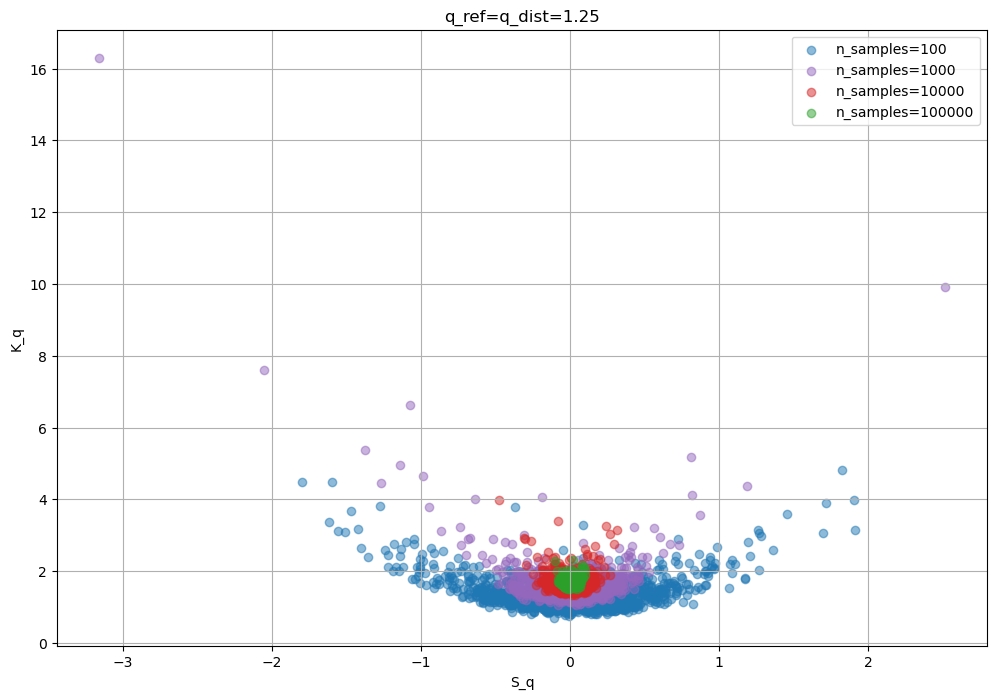

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def qGaussianDist(nSamples, qDist):
    """
    Returns random deviates drawn from a q-gaussian distribution.
    The number of samples returned is nSamples.
    The q that characterizes the q-Gaussian is given by qDist.
    """
    # Check that q < 3
    if qDist < 3:
        # Calculate the q to be used on the q-log
        qGen = (1 + qDist) / (3 - qDist)
        # Initialize the output vector
        qGaussian = np.zeros(nSamples)
        # Loop through, populate the output vector
        for k in range(nSamples):
            # Get two uniform random deviates from numpy's random module
            u1 = np.random.rand()
            u2 = np.random.rand()
            # Apply the q-Box-Muller algorithm, taking only one of two possible values
            R = np.sqrt(-2 * log_q(u1, qGen))
            qGaussian[k] = R * np.sin(2 * np.pi * u2)
        return qGaussian
    else:
        print('q value must be less than 3')
        return 0

def log_q(x, q):
    """
    Returns the q-log of x, using q.
    """
    # Check to see if q = 1
    if q == 1:
        # If q is 1, use the usual natural logarithm
        return np.log(x)
    else:
        # If q differs from 1, use def of the q-log
        return (x ** (1 - q) - 1) / (1 - q)

# Function to calculate q-skewness
def q_skewness(q, x, p_x):
    q_3 = 1 + 3 * (q - 1) / 2
    q_2 = 1 + 2 * (q - 1) / 2
    q_1 = 1 + 1 * (q - 1) / 2
    mean_q = np.sum(x * p_x**q_1) / np.sum(p_x**q_1)
    third_moment = np.sum((x - mean_q)**3 * p_x**q_3) / np.sum(p_x**q_3)
    second_moment = np.sum((x - mean_q)**2 * p_x**q_2) / np.sum(p_x**q_2)
    return third_moment / second_moment**(3/2)

# Function to calculate q-kurtosis
def q_kurtosis(q, x, p_x):
    q_4 = 1 + 4 * (q - 1) / 2
    q_2 = 1 + 2 * (q - 1) / 2
    q_1 = 1 + 1 * (q - 1) / 2
    mean_q = np.sum(x * p_x**q_1) / np.sum(p_x**q_1)
   
    fourth_moment = np.sum((x - mean_q)**4 * p_x**q_4) / np.sum(p_x**q_4)
    second_moment = np.sum((x - mean_q)**2 * p_x**q_2) / np.sum(p_x**q_2)
    return fourth_moment / (3 * second_moment**2)


# Number of simulations
n_simulations = 1000

# Values of n_samples to simulate
n_samples_values = [100, 1000, 10000, 100000]  # You can adjust the values of n_samples here

# Value of q for q_dist
q_dist = 1.25  # You can adjust the value of q_dist here

# Value of q for reference q_ref
q_ref = 1.25  # You can adjust the value of q_ref here

# Dark colors
dark_colors = ['#1f77b4', '#9467bd', '#d62728', '#2ca02c']

# Lists to store results for different n_samples
S_lists = []
K_lists = []

# Loop over different n_samples values
for n_samples, color in zip(n_samples_values, dark_colors):
    S_list = []
    K_list = []
    
    # Generate data for q_dist and calculate S_q and K_q using q_ref
    for _ in range(n_simulations):
        # Generate q-Gaussian samples for q_dist
        samples = qGaussianDist(n_samples, q_dist)
        
        # Compute K_q using q_ref
        K_dist = q_kurtosis(q_ref, samples, np.ones_like(samples)/n_samples)

        # Compute S_q using q_ref
        S_dist = q_skewness(q_ref, samples, np.ones_like(samples)/n_samples)
        
        # Append results to lists
        S_list.append(S_dist)
        K_list.append(K_dist)
    
    # Append results for this n_samples value to the overall lists
    S_lists.append(S_list)
    K_lists.append(K_list)

# Plot S_q vs K_q for each n_samples value
plt.figure(figsize=(12, 8))
for i, n_samples in enumerate(n_samples_values):
    plt.scatter(S_lists[i], K_lists[i], alpha=0.5, label=f'n_samples={n_samples}', color=dark_colors[i])
plt.xlabel('S_q')
plt.ylabel('K_q')
plt.title(f'q_ref=q_dist={q_ref}')
plt.legend()
plt.grid(True)
plt.show()


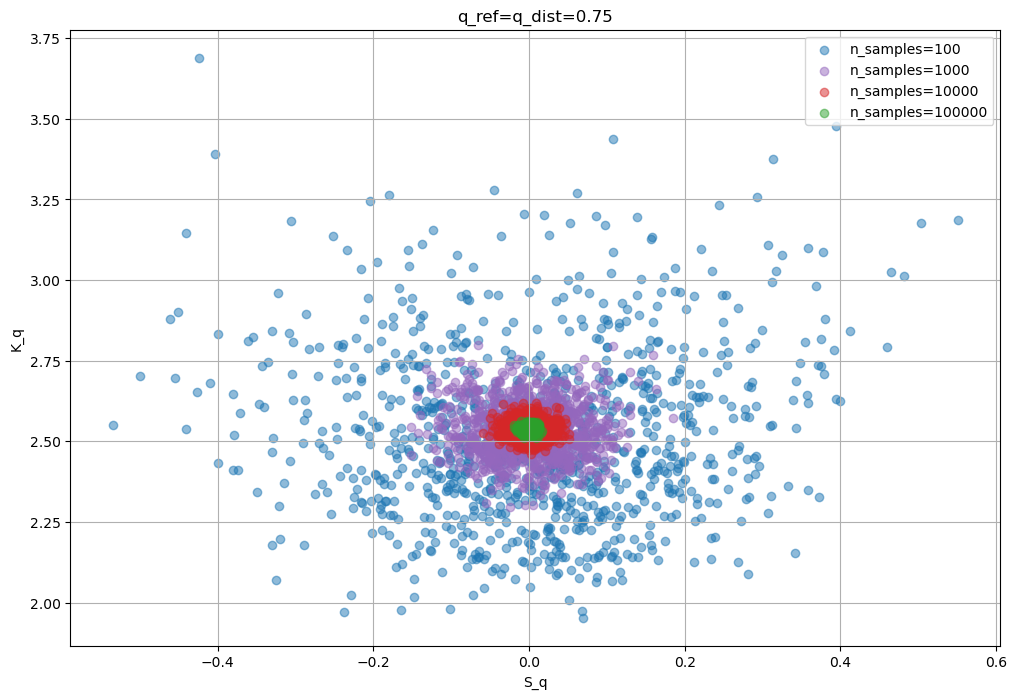

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def qGaussianDist(nSamples, qDist):
    
    # Check that q < 3
    if qDist < 3:
        # Calculate the q to be used on the q-log
        qGen = (1 + qDist) / (3 - qDist)
        qGaussian = np.zeros(nSamples)
        for k in range(nSamples):
            # Get two uniform random deviates 
            u1 = np.random.rand()
            u2 = np.random.rand()
            # Apply the q-Box-Muller algorithm
            R = np.sqrt(-2 * log_q(u1, qGen))
            qGaussian[k] = R * np.sin(2 * np.pi * u2)
        return qGaussian
    else:
        print('q value must be less than 3')
        return 0

def log_q(x, q):
    
    if q == 1:
        return np.log(x)
    else:
        return (x ** (1 - q) - 1) / (1 - q)

# Function to calculate q-skewness
def q_skewness(q, x, p_x):
    q_3 = 1 + 3 * (q - 1) / 2
    q_2 = 1 + 2 * (q - 1) / 2
    q_1 = 1 + 1 * (q - 1) / 2
    mean_q = np.sum(x * p_x**q_1) / np.sum(p_x**q_1)
    third_moment = np.sum((x - mean_q)**3 * p_x**q_3) / np.sum(p_x**q_3)
    second_moment = np.sum((x - mean_q)**2 * p_x**q_2) / np.sum(p_x**q_2)
    return third_moment / second_moment**(3/2)

# Function to calculate q-kurtosis
def q_kurtosis(q, x, p_x):
    q_4 = 1 + 4 * (q - 1) / 2
    q_2 = 1 + 2 * (q - 1) / 2
    q_1 = 1 + 1 * (q - 1) / 2
    mean_q = np.sum(x * p_x**q_1) / np.sum(p_x**q_1)
   
    fourth_moment = np.sum((x - mean_q)**4 * p_x**q_4) / np.sum(p_x**q_4)
    second_moment = np.sum((x - mean_q)**2 * p_x**q_2) / np.sum(p_x**q_2)
    return fourth_moment / ( second_moment**2)


# Number of simulations
n_simulations = 1000

# Values of n_samples to simulate
n_samples_values = [100, 1000, 10000, 100000]  

# Value of q for q_dist
q_dist = 0.75  
# Value of q for q_ref
q_ref = 0.75  

# Dark colors
dark_colors = ['#1f77b4', '#9467bd', '#d62728', '#2ca02c']

# Lists to store results for different n_samples
S_lists = []
K_lists = []

# Loop over different n_samples values
for n_samples, color in zip(n_samples_values, dark_colors):
    S_list = []
    K_list = []
    
    # Generate data for q_dist and calculate S_q and K_q using q_ref
    for _ in range(n_simulations):
        # Generate q-Gaussian samples for q_dist
        samples = qGaussianDist(n_samples, q_dist)
        
        # Compute K_q using q_ref
        K_dist = q_kurtosis(q_ref, samples, np.ones_like(samples)/n_samples)

        # Compute S_q using q_ref
        S_dist = q_skewness(q_ref, samples, np.ones_like(samples)/n_samples)
        
        # Append results to lists
        S_list.append(S_dist)
        K_list.append(K_dist)
    
    # Append results for this n_samples value to the overall lists
    S_lists.append(S_list)
    K_lists.append(K_list)

# Plot S_q vs K_q for each n_samples value
plt.figure(figsize=(12, 8))
for i, n_samples in enumerate(n_samples_values):
    plt.scatter(S_lists[i], K_lists[i], alpha=0.5, label=f'n_samples={n_samples}', color=dark_colors[i])
plt.xlabel('S_q')
plt.ylabel('K_q')
plt.title(f'q_ref=q_dist={q_ref}')
plt.legend()
plt.grid(True)
plt.show()
